In [1]:
#What is the problem trying to be solved.
#predicting nba player's position based on their height, weight, points per game, rebounds per game and assist per game

In [2]:
import pandas as pd
df = pd.read_csv("NBA Players - Advanced Season Stats (1978-2016).csv")
df2 = pd.read_csv("NBA Players - Basic Season Stats (1950-2017).csv")
df.tail()

/anaconda3/lib/python3.6/site-packages/IPython/core/interactiveshell.py:2785: DtypeWarning: Columns (18,23) have mixed types. Specify dtype option on import or set low_memory=False.
  interactivity=interactivity, compiler=compiler, result=result)


,year,tm,player,age,g,mp,per,ts,3par,ftr,...,d_worp,adjusted_worp,estimated_position,bbref_pos,age_on_feb_1,yrs_experience,height,weight,rounded_position,rounded_age
17724,2016,BRK,0,0,0,0,0.0,0.0,0.0,0.0,...,0.0,NaN,0.0,NaN,NaN,NaN,NaN,NaN,0.0,NaN
17725,2016,BRK,0,0,0,0,0.0,0.0,0.0,0.0,...,0.0,NaN,0.0,NaN,NaN,NaN,NaN,NaN,0.0,NaN
17726,2016,BRK,0,0,0,0,0.0,0.0,0.0,0.0,...,0.0,NaN,0.0,NaN,NaN,NaN,NaN,NaN,0.0,NaN
17727,2016,BRK,0,0,0,0,0.0,0.0,0.0,0.0,...,0.0,NaN,0.0,NaN,NaN,NaN,NaN,NaN,0.0,NaN
17728,2016,BRK,0,0,0,0,0.0,0.0,0.0,0.0,...,0.0,NaN,0.0,NaN,NaN,NaN,NaN,NaN,0.0,NaN


In [3]:
#data cleaning
#selected the desired columns,
#player, height, weight , bbref_pos from df
#player name, pts ,trb, ast from df2
#divided pts , trb , and ast by games player to get average
#round up the numbers to two decimal place
#merge both datasets
#replace bbref_pos with actual positions instead of numbers

In [4]:
#selecting df data
df1 = df.loc[:,['player','height','weight','bbref_pos']]
df1 = df1.dropna()
df1['bbref_pos'] = df1['bbref_pos'].astype(float).round().astype(int)
df1 = df1.rename(index = str,columns = {'player':'Player Name'})
df1.tail()

,Player Name,height,weight,bbref_pos
17258,Walter Tavares,87.0,260.0,5
17259,Shayne Whittington,83.0,250.0,4
17260,Solomon Hill,79.0,225.0,3
17261,Jeff Withey,84.0,231.0,5
17262,Cristiano Felicio,82.0,275.0,4


In [5]:
#selecting df2 data
df2 = df2.loc[:,['Player Name','G','PTS','AST','TRB']]
df2.head()
df2['PTS'] = df2['PTS']/df2['G']
df2['TRB'] = df2['TRB']/df2['G']
df2['AST'] = df2['AST']/df2['G']
#df2['STL'] = df2['STL']/df2['G']
#df2['BLK'] = df2['BLK']/df2['G']
df2 =df2.dropna()

In [6]:
df2 = df2.round(2)
df2.head()

,Player Name,G,PTS,AST,TRB
0,A.C. Green,82.0,6.35,0.66,4.65
1,A.C. Green,79.0,10.78,1.06,7.78
2,A.C. Green,82.0,11.43,1.13,8.66
3,A.C. Green,82.0,13.27,1.26,9.01
4,A.C. Green,82.0,12.94,1.10,8.68


In [7]:
df1 = df1.merge(df2,on="Player Name")
df1 = df1.drop_duplicates(subset="Player Name",keep='first')
df1.head()

,Player Name,height,weight,bbref_pos,G,PTS,AST,TRB
0,Truck Robinson,79.0,225.0,4,76.0,5.82,0.53,3.96
135,Randy Smith,75.0,180.0,2,76.0,13.45,2.49,4.84
233,Ricky Sobers,75.0,198.0,1,78.0,9.21,2.76,3.32
332,Scott Wedman,79.0,215.0,3,80.0,11.11,1.61,6.12
497,Phil Smith,76.0,185.0,2,74.0,7.69,1.82,1.89


In [8]:
df1['bbref_pos'].replace(1,'point guard',inplace =True)
df1['bbref_pos'].replace(2,'shooting guard',inplace =True)
df1['bbref_pos'].replace(3,'small forward',inplace =True)
df1['bbref_pos'].replace(4,'power forward',inplace =True)
df1['bbref_pos'].replace(5,'center',inplace =True)

In [9]:
import seaborn as sns
import matplotlib.pyplot as plt
h=df1.loc[:,['height','weight','bbref_pos']]
ax= sns.scatterplot(x="weight", y="height",hue="bbref_pos", data=h)
ax.set(ylim=(60))
ax.set(xlim=(130))

[(130, 378.00073185483876)]

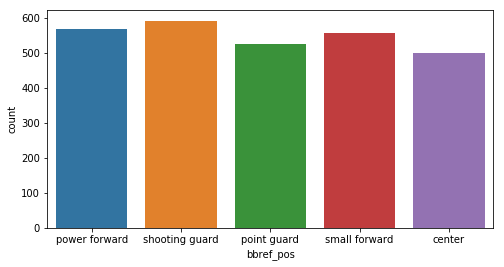

In [10]:
d=df1['bbref_pos']
plt.figure(figsize=(8,4))
sns.countplot(d)
plt.show()

/anaconda3/lib/python3.6/site-packages/scipy/stats/stats.py:1713: FutureWarning: Using a non-tuple sequence for multidimensional indexing is deprecated; use `arr[tuple(seq)]` instead of `arr[seq]`. In the future this will be interpreted as an array index, `arr[np.array(seq)]`, which will result either in an error or a different result.
  return np.add.reduce(sorted[indexer] * weights, axis=axis) / sumval


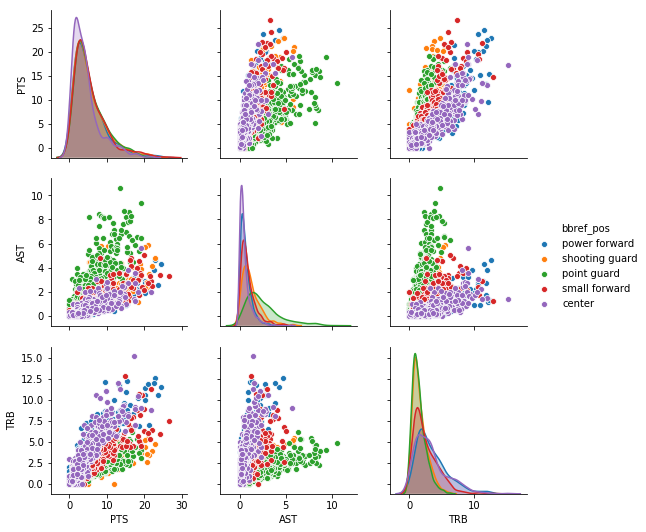

In [11]:
sns.pairplot(df1[['bbref_pos','PTS','AST','TRB']],hue="bbref_pos")

In [12]:
#data visualization
#bar chart to represent the player count in each position
#scatter plots for player height and weight by position
#bar chart showing player pts, rebounds and ast by position
#explain patterns found in data

In [13]:
#attempt to predict a players position based on height, weight, pts , rebounds and ast
#train model using a test split of 70/30 as it produced the best results
#used two classifiers, knnclassifier and decisionTreeClassifier
#knn classifier had a higher accuracy among the two with 0.675

In [14]:
from sklearn.model_selection import train_test_split
from sklearn import metrics

y = df1['bbref_pos']
x = df1.loc[:,['height','weight','PTS','AST','TRB']]
x_train, x_test,y_train,y_test = train_test_split(x,y,test_size = 0.3)

In [57]:
print("x:",x.shape)
print("x_train:",x_train.shape)
print("x_test:",x_test.shape)

x: (2738, 5)
x_train: (1916, 5)
x_test: (822, 5)
187306    shooting guard
107183     power forward
141726            center
176296    shooting guard
13941      power forward
55688        point guard
108896            center
72959      power forward
30677        point guard
94748     shooting guard
187180     small forward
18797      power forward
72202     shooting guard
59763      small forward
119735     small forward
83326     shooting guard
72626      power forward
10882        point guard
187915     small forward
132569     small forward
174931       point guard
128136       point guard
31033             center
24909      power forward
182545            center
137363    shooting guard
186503       point guard
119842     power forward
83118             center
32005      small forward
               ...      
187993       point guard
43451             center
70099      small forward
186394     small forward
180671            center
156985       point guard
186381     power forward
1

In [16]:
print("y:",y.shape)
print('y_train:',y_train.shape)
print('y_test:',y_test.shape)

y: (2738,)
y_train: (1916,)
y_test: (822,)


In [68]:
from sklearn.tree import DecisionTreeClassifier
# clf = DecisionTreeClassifier()
# clf =clf.fit(x_train,y_train)
# y_pred = clf.predict(x_test)
# print(metrics.accuracy_score(y_test,y_pred))

0.6192214111922141


In [18]:
from sklearn import model_selection 
kfold = model_selection.KFold(n_splits = 10, random_state=None,shuffle = False)
model = DecisionTreeClassifier()
scoring = 'accuracy'
results = model_selection.cross_val_score(model, x, y, cv=kfold, scoring=scoring)
print("Accuracy: %0.3f(%0.3f)"%(results.mean(), results.std()))

Accuracy: 0.625(0.024)


In [67]:
from sklearn.linear_model import LogisticRegression
# logreg = LogisticRegression()
# logreg.fit(x_train,y_train)
# y_pred = logreg.predict(x_test)
# print(metrics.accuracy_score(y_test,y_pred))

0.5498783454987834


In [20]:
model = LogisticRegression()
scoring = 'accuracy'
results = model_selection.cross_val_score(model, x, y, cv=kfold, scoring=scoring)
print("Accuracy: %0.3f(%0.3f)"%(results.mean(), results.std()))

Accuracy: 0.563(0.026)


In [21]:
from sklearn.neighbors import KNeighborsClassifier
knn = KNeighborsClassifier(n_neighbors =10)
knn.fit(x_train,y_train)
y_pred = knn.predict(x_test)
print(metrics.accuracy_score(y_test,y_pred))

0.6301703163017032


In [22]:
k_range = list(range(1,50))
score = []
for k in k_range:
    knn = KNeighborsClassifier(n_neighbors= k)
    knn.fit(x_train,y_train)
    y_pred = knn.predict(x_test)
    score.append(metrics.accuracy_score(y_test,y_pred))
    #print(score[k-1])

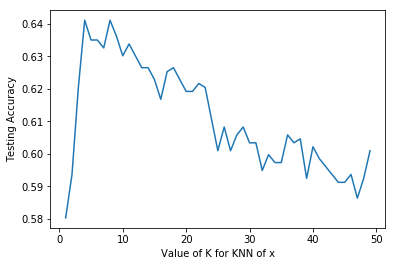

In [23]:
import matplotlib.pyplot as plt
%matplotlib inline

plt.plot(k_range, score)
plt.xlabel('Value of K for KNN of x')
plt.ylabel('Testing Accuracy')
plt.show()

In [24]:
knn = KNeighborsClassifier(n_neighbors =9)
knn.fit(x_train,y_train)
y_pred = knn.predict(x_test)
print(metrics.accuracy_score(y_test,y_pred))
knn.predict([[70,300,10,7,2]])

0.6362530413625304


array(['center'], dtype=object)

In [25]:
kfold = model_selection.KFold(n_splits = 10, random_state=None,shuffle = False)
model = KNeighborsClassifier(n_neighbors = 9)
scoring = 'accuracy'
results = model_selection.cross_val_score(model, x, y, cv=kfold, scoring=scoring)
print("Accuracy: %0.3f(%0.3f)"%(results.mean(), results.std()))

Accuracy: 0.652(0.051)


In [63]:
import numpy as np
from sklearn.metrics import confusion_matrix
matrix = confusion_matrix(y_test, y_pred)
print(matrix)

[[111   0  42   0   2]
 [  0 117   0  32   1]
 [ 39   0 101   1  30]
 [  0  36   3 101  40]
 [  4   2  40  27  93]]


In [64]:
#normalize the matrix
matrix = matrix.astype('float') / matrix.sum(axis=1)[:, np.newaxis]
print(matrix)

[[0.71612903 0.         0.27096774 0.         0.01290323]
 [0.         0.78       0.         0.21333333 0.00666667]
 [0.22807018 0.         0.59064327 0.00584795 0.1754386 ]
 [0.         0.2        0.01666667 0.56111111 0.22222222]
 [0.02409639 0.01204819 0.24096386 0.1626506  0.56024096]]


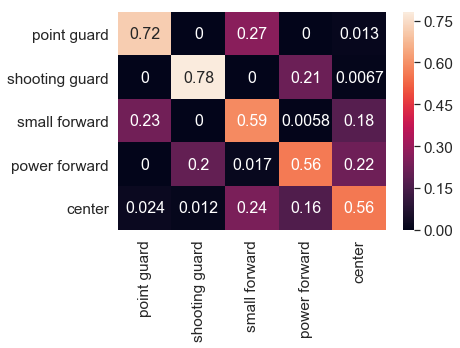

In [66]:
df_cm = pd.DataFrame(matrix, range(5),range(5))
df_cm = df_cm.rename(index = {0:'point guard',1:'shooting guard',2:'small forward',3:'power forward',4:'center'}
                     ,columns = {0:'point guard',1:'shooting guard',2:'small forward',3:'power forward',4:'center'})
sns.set(font_scale = 1.4)
sns.heatmap(df_cm, annot=True,annot_kws={"size": 16})

In [69]:
from sklearn.metrics import classification_report
report = classification_report(y_test, y_pred)
print(report)

                precision    recall  f1-score   support

        center       0.68      0.68      0.68       155
   point guard       0.77      0.79      0.78       150
 power forward       0.51      0.50      0.51       171
shooting guard       0.62      0.64      0.63       180
 small forward       0.52      0.49      0.50       166

   avg / total       0.62      0.62      0.62       822



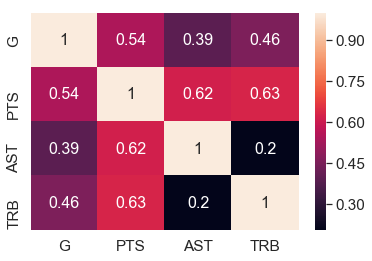

In [70]:

corr = df2.corr()
sns.heatmap(corr, annot=True,annot_kws={"size": 16})